Loading the Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3

In [3]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Images",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size =BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


In [4]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(dataset)


645

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])  #output you get is a tensor
    #if you want to convert it into a numpy
    # print(image_batch[0].numpy()) -> will give you a 3D array


tf.Tensor(
[[[171. 166. 189.]
  [180. 175. 198.]
  [182. 177. 200.]
  ...
  [112. 100. 114.]
  [113. 101. 115.]
  [147. 135. 149.]]

 [[175. 170. 193.]
  [175. 170. 193.]
  [169. 164. 187.]
  ...
  [ 75.  63.  77.]
  [135. 123. 137.]
  [ 98.  86. 100.]]

 [[194. 189. 212.]
  [188. 183. 206.]
  [179. 174. 197.]
  ...
  [ 85.  73.  87.]
  [148. 136. 150.]
  [122. 110. 124.]]

 ...

 [[166. 154. 168.]
  [133. 121. 135.]
  [145. 133. 147.]
  ...
  [121. 110. 127.]
  [121. 110. 127.]
  [127. 116. 133.]]

 [[ 96.  84.  98.]
  [135. 123. 137.]
  [116. 104. 118.]
  ...
  [112. 101. 118.]
  [114. 103. 120.]
  [115. 104. 121.]]

 [[159. 147. 161.]
  [ 95.  83.  97.]
  [135. 123. 137.]
  ...
  [104.  93. 110.]
  [105.  94. 111.]
  [ 98.  87. 104.]]], shape=(256, 256, 3), dtype=float32)


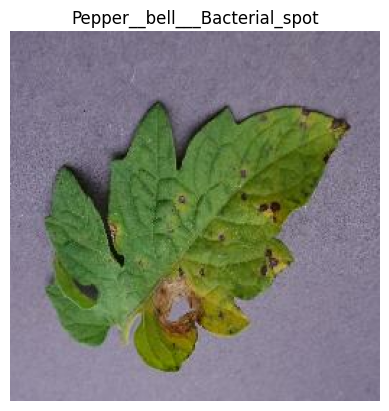

In [7]:
# Visualizing the Images
for image_batch,label_match in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

In [10]:
# 80% ==> training 
# 20% ==> 10% validation ,10% test

In [11]:
train_size = 0.8 
len(dataset)*train_size

516.0

In [12]:
train_ds = dataset.take(516)
len(train_ds)

516

In [13]:
test_ds = dataset.skip(516)
len(test_ds)

129

In [14]:
val_size = 0.1
len(dataset)*val_size

64.5

In [15]:
val_ds = test_ds.take(64)
len(val_ds)

64

In [16]:
test_ds = test_ds.skip(64)
len(test_ds)

65

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

Preprocessing Part


In [18]:
# Rescaling
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([ 
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [20]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = "relu" , input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
])
model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

Model Training

In [23]:
model.fit(
    train_ds,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50


: 